In [24]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import eval_legendre, legendre
from scipy.integrate import quad
from itertools import cycle
from pandas import *

In [25]:
lines=["-","--","-.",":"]

In [27]:
line=cycle(lines)

In [2]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

In [3]:
def h_(x, m=0.02, p=0.4):
    xx = 0.5*(x+1)
    if xx<=p:
        return 2*m/p**2*(2*p*xx-xx**2)
    else:
        return 2*m/(1-p)**2*(1-2*p+2*p*xx-xx**2)
h = np.vectorize(h_)

<IPython.core.display.Javascript object>


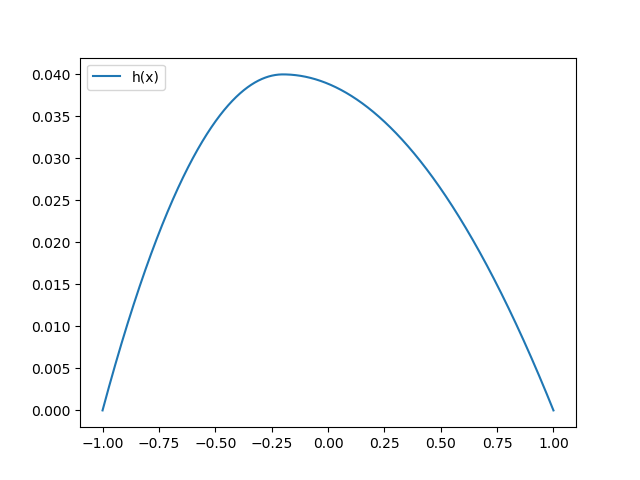

In [4]:
x = np.linspace(-1, 1,10000)
plt.figure()
plt.plot(x, h(x),label='h(x)')
plt.legend(loc='upper left')

In [5]:
N = 10
η = np.empty(N)

for i in range(N):
    η[i] = (2*i+1)/2*quad(lambda x: h(x)*eval_legendre(i, x), -1, 1)[0]

In [6]:
def eval_poly (η, x):
    y = np.zeros_like(x)
    
    for i in range(len(η)):
        y += η[i]*eval_legendre(i, x)
        
    return y

In [7]:
def error_poly (η, x):
    y = np.zeros_like(x)
    e = np.zeros_like(x)
    
    for i in range(len(η)):
        y += η[i]*eval_legendre(i, x)
        #e=((h(x)-y))#/h(x))*100
        e=(h(x)-y)/np.max(h(x))*100
    return e

<IPython.core.display.Javascript object>


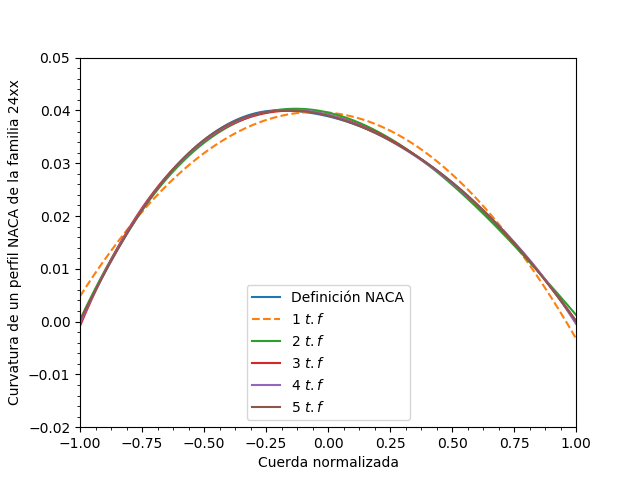

In [46]:
plt.figure()
plt.plot(x, h(x), label='Definición NACA')
i=3
plt.plot(x, eval_poly(η[:i], x), label=r'$%d$ $t.f$'%(i-2),linestyle='--')
for i in range(4,8):
    plt.plot(x, eval_poly(η[:i], x), label=r'$%d$ $t.f$'%(i-2))
plt.xlim(-1,1)
plt.ylim(-0.02,0.05)
plt.xlabel('Cuerda normalizada')
plt.ylabel('Curvatura de un perfil NACA de la familia 24xx')
plt.minorticks_on()
plt.legend(loc='lower center')#,ncol=4)#prop={'size':7})
plt.savefig('curvatura',dpi=300)

<IPython.core.display.Javascript object>


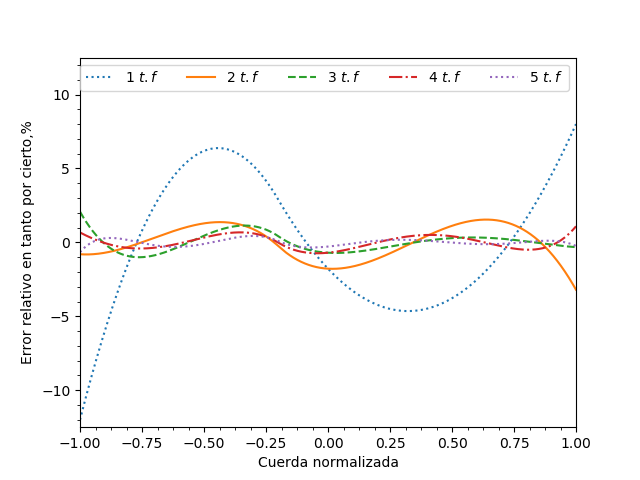

In [47]:
plt.figure()
for i in range(3,8):
    plt.plot(x, error_poly(η[:i], x), label=r'$%d$ $t.f$'%(i-2),linestyle=next(line))
plt.legend(ncol=5,loc='best')
plt.xlim(-1,1)
plt.ylim(-12.5,12.5)
plt.xlabel('Cuerda normalizada')
plt.ylabel('Error relativo en tanto por cierto,%')
plt.minorticks_on()
plt.savefig('errorrelativo',dpi=300)

In [11]:
np.sqrt(np.sum((eval_poly(η[:7], x)-h(x))**2)/len(h(x)))

8.1860043074471011e-05

In [12]:
np.sum(eval_poly(η[:7], x)*h(x))/np.sum(h(x)**2)

0.99999214854243856

In [13]:

a=np.linspace(-(10*np.pi)/180,(10*np.pi)/180,100)



In [14]:
def cl(a,n):
    a0=η[1]
    if n>1:
        a0+=(3/2)*η[2]
        if n>2:
            a0+=(9/4)*η[3]
            if n>3:
                a0+=(45/16)*η[4]
                if n>4:
                    a0+=(225/64)*η[5]
                    if n>5:
                        a0+=(945/512)*η[6]
    cl=2*np.pi*(a-a0)        
    return cl,a0

In [21]:
(η[1]+(3/2)*η[2])*180/np.pi

-2.4522593048378396

In [22]:
cl(a,7)[1]*180/np.pi

-2.1174916438413649

In [23]:
cl(a,7)[0][0]

-0.86441376848407669

In [24]:
2*np.pi

6.283185307179586

In [25]:
(cl(a,6)[0][99]-cl(a,6)[0][0])/20*180/np.pi

6.2831853071795862

<IPython.core.display.Javascript object>


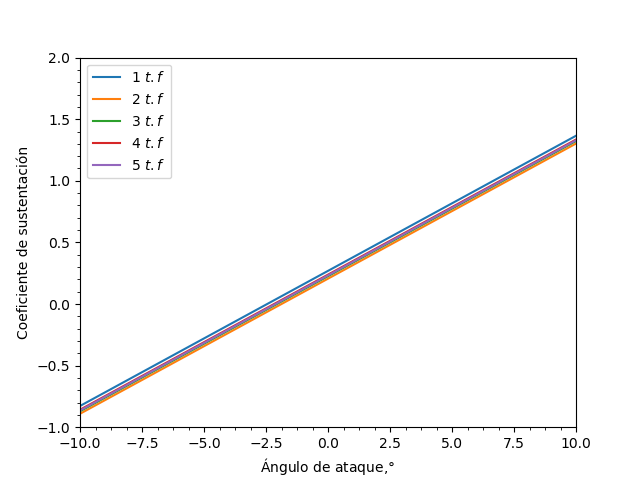

In [31]:
plt.figure()
for i in range(2,7):
    plt.plot(a*180/np.pi,cl(a,i)[0],label=r'$%d$ $t.f$'%(i-1))
    plt.legend(loc='upper left')
    plt.ylim(-1,2)
    plt.xlim(-10,10)
plt.xlabel( 'Ángulo de ataque,'r'$\degree$')
plt.ylabel('Coeficiente de sustentación')
plt.minorticks_on()
plt.savefig('cl',dpi=300)

In [33]:
def cm(n):
    cm=(3/4)*η[2]
    if n>2:
        cm+=(15/16)*η[3]
        if n>3:
            cm+=(45/32)*η[4]
            if n>4:
                cm+=(105/64)*η[5]
                if n>5:
                    cm+=(945/1024)*η[6]
    return np.pi*cm
                    

<IPython.core.display.Javascript object>


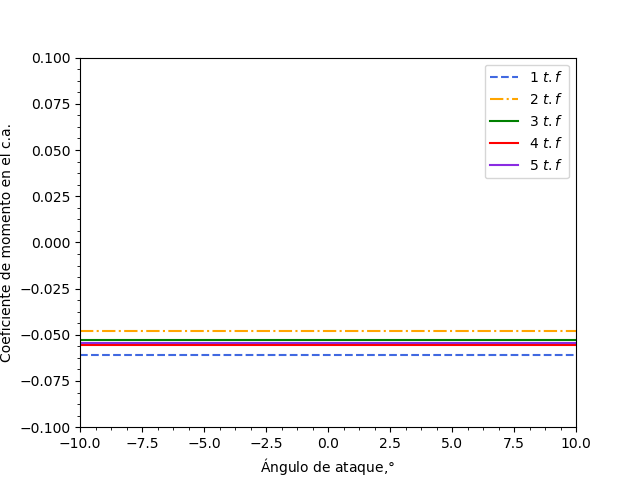

In [48]:
plt.figure()
plt.axhline(cm(2), color='royalblue',label=r'$%d$ $t.f$'%1,linestyle='--')
plt.axhline(cm(3), color='orange',label=r'$%d$ $t.f$'%2,linestyle='-.')
plt.axhline(cm(4), color='green',label=r'$%d$ $t.f$'%3)
plt.axhline(cm(5), color='red',label=r'$%d$ $t.f$'%4)
plt.axhline(cm(6), color='blueviolet',label=r'$%d$ $t.f$'%5)
plt.legend(loc='upper right')
plt.ylim(-0.1,0.1)
plt.xlim(-10,10)
plt.xlabel( 'Ángulo de ataque,'r'$\degree$')
plt.ylabel('Coeficiente de momento en el c.a.')
plt.minorticks_on()
plt.savefig('cm',dpi=300)

<IPython.core.display.Javascript object>


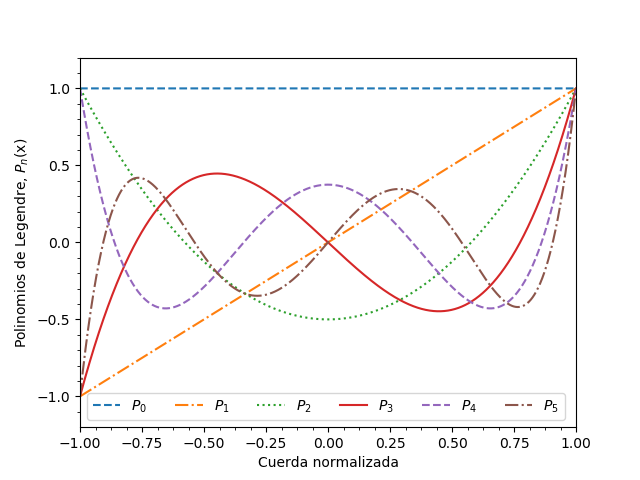

In [37]:
plt.figure()
for i in range(6):
    plt.plot(x,legendre(i)(x),label=r'$P_%d$'%i,linestyle=next(line))
plt.xlim(-1,1)
plt.ylim(-1.2,1.2)
plt.xlabel('Cuerda normalizada')
plt.ylabel('Polinomios de Legendre, $P_n%$(x)')
plt.minorticks_on()
plt.legend(ncol=6)
plt.savefig('0',dpi=300)

In [35]:
import csv

naca2408 = []
with open("naca2408.csv") as csvfile:
    reader = csv.reader(csvfile, quoting=csv.QUOTE_NONNUMERIC)
    for row in reader: # each row is a list
        naca2408.append(row)

In [36]:
naca2410 = []
with open("naca2410.csv") as csvfile:
    reader = csv.reader(csvfile, quoting=csv.QUOTE_NONNUMERIC) 
    for row in reader:
        naca2410.append(row)

In [37]:
naca2412 = []
with open("naca2412.csv") as csvfile:
    reader = csv.reader(csvfile, quoting=csv.QUOTE_NONNUMERIC)
    for row in reader: 
        naca2412.append(row)

In [38]:
naca2414 = []
with open("naca2414.csv") as csvfile:
    reader = csv.reader(csvfile, quoting=csv.QUOTE_NONNUMERIC) 
    for row in reader:
        naca2414.append(row)

In [39]:
naca2424 = []
with open("naca2414.csv") as csvfile:
    reader = csv.reader(csvfile, quoting=csv.QUOTE_NONNUMERIC) # change contents to floats
    for row in reader: # each row is a list
        naca2424.append(row)

In [40]:
naca2408=np.asarray(naca2408)
naca2410=np.asarray(naca2410)
naca2412=np.asarray(naca2412)
naca2414=np.asarray(naca2414)
naca2424=np.asarray(naca2424)

In [41]:
a=np.linspace(-(15*np.pi)/180,(15*np.pi)/180,100)


<IPython.core.display.Javascript object>


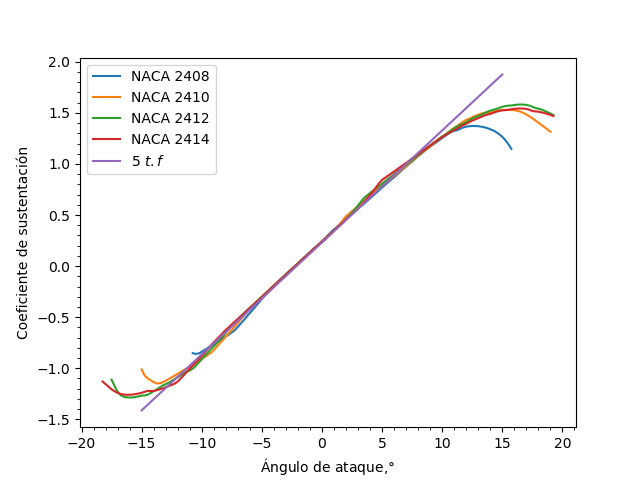

In [44]:
plt.figure()
plt.plot(naca2408[:,0],naca2408[:,1],label='NACA 2408')
plt.plot(naca2410[:,0],naca2410[:,1],label='NACA 2410')
plt.plot(naca2412[:,0],naca2412[:,1],label='NACA 2412')
plt.plot(naca2414[:,0],naca2414[:,1],label='NACA 2414')
plt.plot(a*180/np.pi,cl(a,6)[0], label=r'$%d$ $t.f$'%5)
plt.legend(loc='best')
plt.xlabel('Ángulo de ataque,'r'$\degree$')
plt.ylabel('Coeficiente de sustentación')
plt.minorticks_on()
#plt.xlim(-10,10)
#plt.ylim(-1,2)
plt.savefig('clnaca',dpi=300)

In [39]:
n=6
t=[0 for i in range(n)]
t[0]=np.poly1d([1.])
t[1]=np.poly1d([1., 0.])
for i in range(2,n):
    t[i]=2*t[1]*t[i-1]-t[i-2]

<IPython.core.display.Javascript object>


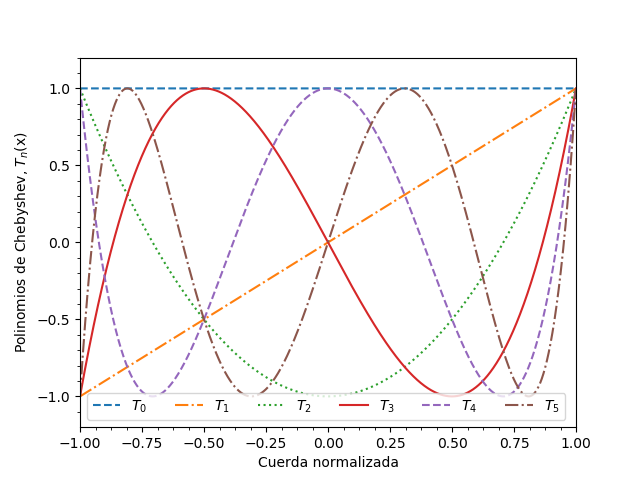

In [41]:
plt.figure()
for i in range(6):
    plt.plot(x,t[i](x),label=r'$T_%d$'%i,linestyle=next(line))
plt.xlim(-1,1)
plt.ylim(-1.2,1.2)
plt.xlabel('Cuerda normalizada')
plt.ylabel('Polinomios de Chebyshev, $T_n%$(x)')
plt.minorticks_on()
plt.legend(ncol=6)
plt.savefig('1',dpi=300)